### Before Start

If you want to have box highlight please make sure you have setup [Object Detection Tensorflow model](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/installation.md) setup in the path. 

If want to classified only images, comment out 
```
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

## and the visualize part
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np, 
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=5,
    line_thickness=8)
plt.figure(figsize=(12,8))
plt.imshow(image_np)
plt.show()

```

In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import random

%matplotlib inline

In [3]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

### Test Simulator Data

SCORES
[0.70341873 0.64212865 0.32747138 0.20477492 0.1307355  0.11976164
 0.07065973 0.06469191 0.06036817 0.03527507]
CLASSES
[2. 2. 1. 2. 2. 2. 1. 1. 1. 2.]


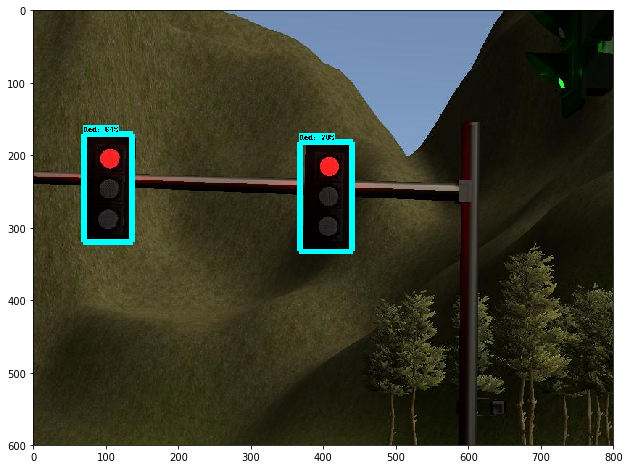

SCORES
[0.8408199  0.5029958  0.186305   0.1435753  0.11526565 0.03498889
 0.02834328 0.01915289 0.01167612 0.01079424]
CLASSES
[3. 3. 3. 3. 2. 2. 2. 2. 2. 2.]


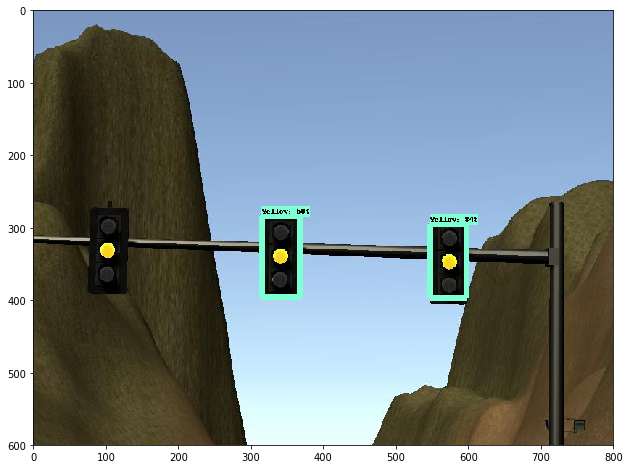

SCORES
[0.70341873 0.64212865 0.32747138 0.20477492 0.1307355  0.11976164
 0.07065973 0.06469191 0.06036817 0.03527507]
CLASSES
[2. 2. 1. 2. 2. 2. 1. 1. 1. 2.]


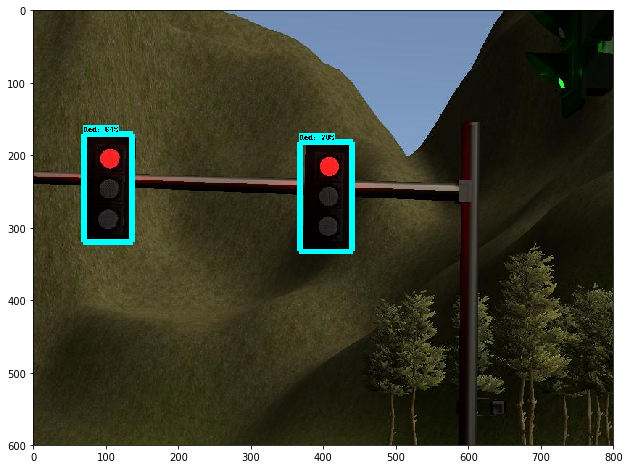

SCORES
[0.9779914  0.04469477 0.03083672 0.02999247 0.0269464  0.02616641
 0.02472094 0.02292717 0.0208555  0.02054984]
CLASSES
[1. 3. 1. 2. 4. 2. 4. 2. 2. 4.]


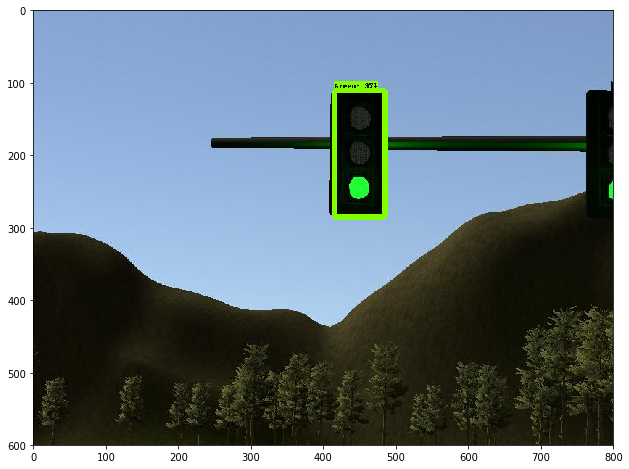

SCORES
[0.70341873 0.64212865 0.32747138 0.20477492 0.1307355  0.11976164
 0.07065973 0.06469191 0.06036817 0.03527507]
CLASSES
[2. 2. 1. 2. 2. 2. 1. 1. 1. 2.]


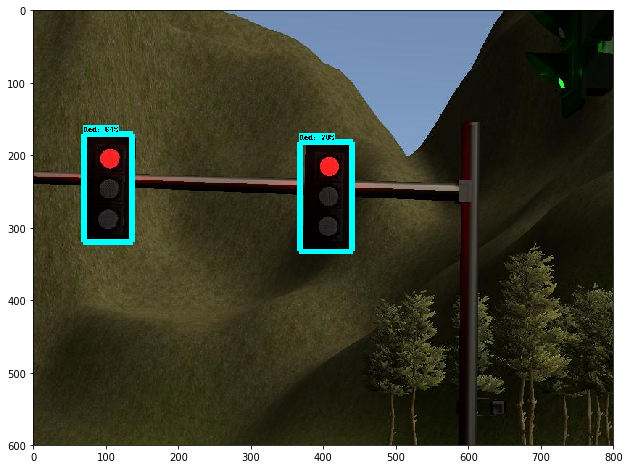

In [13]:
## Test model## Test 
PATH_TO_GRAPH = 'model/frozen_inference_graph_large_sim.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = 'data/label_map.pbtxt'
NUM_CLASSES = 4
detection_graph = load_graph(PATH_TO_GRAPH)

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

PATH_TO_IMGS = 'data/sample_sim'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, '*.png'))
random.shuffle(TEST_IMGS)
TEST_IMGS = TEST_IMGS[:5]

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=(12,8))
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break

### Test Real Image

In [15]:
## Test model
PATH_TO_GRAPH = 'model/frozen_inference_graph_large_real.pb' ## load SSD trained on udacity's parking lot images
PATH_TO_LABELS = 'data/label_map.pbtxt'
NUM_CLASSES = 4

detection_graph = load_graph(PATH_TO_GRAPH)

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': u'Green'}, 2: {'id': 2, 'name': u'Red'}, 3: {'id': 3, 'name': u'Yellow'}, 4: {'id': 4, 'name': u'off'}}


SCORES
[0.00310049 0.00301994 0.00275716 0.00248247 0.00245626 0.00233968
 0.00231155 0.00224495 0.00219321 0.00211743]
CLASSES
[3. 2. 3. 2. 1. 4. 4. 3. 3. 4.]


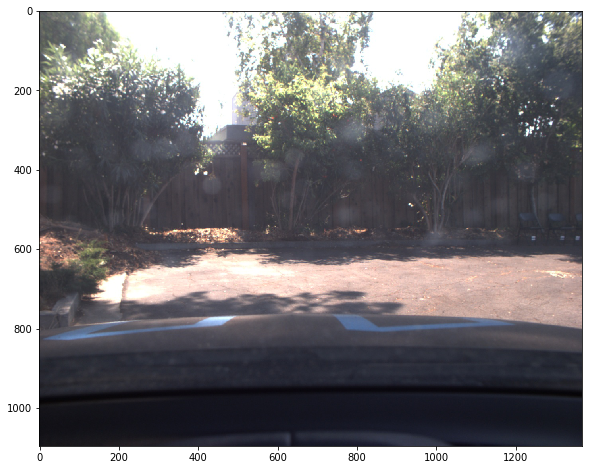

SCORES
[0.73577493 0.00270114 0.00262705 0.00200614 0.00197598 0.00197018
 0.00193575 0.00167324 0.0016457  0.00162168]
CLASSES
[3. 3. 2. 2. 4. 4. 2. 4. 4. 4.]


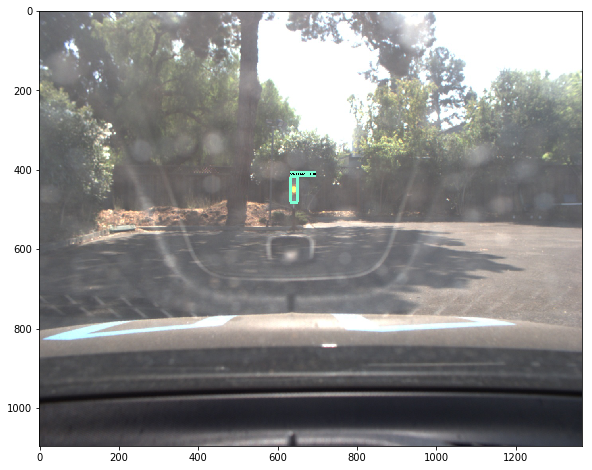

SCORES
[0.00358245 0.00336105 0.00272005 0.00267142 0.00260667 0.0025862
 0.00252003 0.00239707 0.00237629 0.00234072]
CLASSES
[3. 3. 1. 3. 3. 2. 2. 4. 3. 2.]


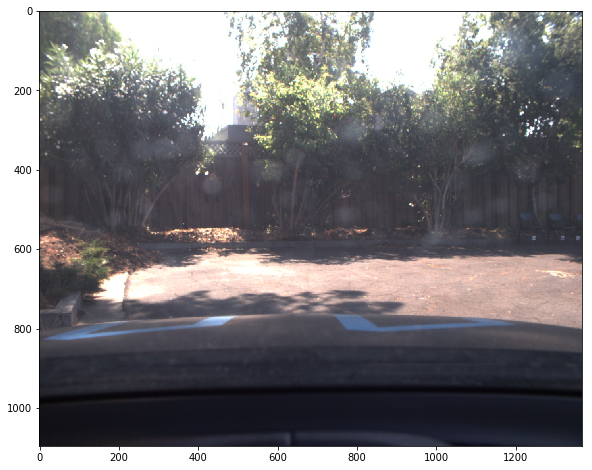

SCORES
[0.99323845 0.00311725 0.00294677 0.00265449 0.00258331 0.00223795
 0.00217305 0.00210477 0.00209686 0.00203971]
CLASSES
[1. 4. 3. 4. 4. 1. 2. 3. 1. 2.]


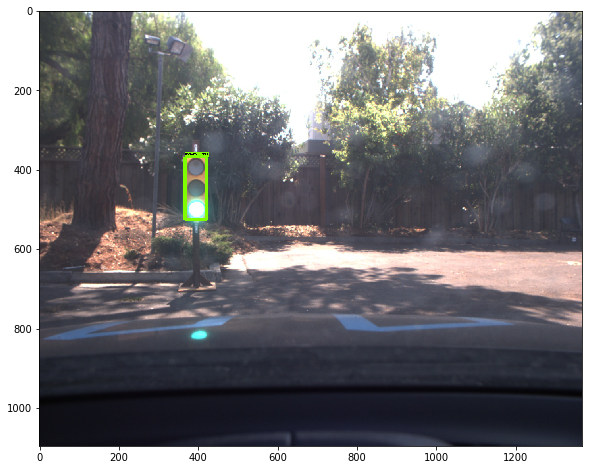

SCORES
[0.9770916  0.0024409  0.00234844 0.00218207 0.00186398 0.00181707
 0.00177586 0.00174792 0.0017429  0.0017118 ]
CLASSES
[1. 4. 2. 3. 4. 4. 4. 4. 4. 4.]


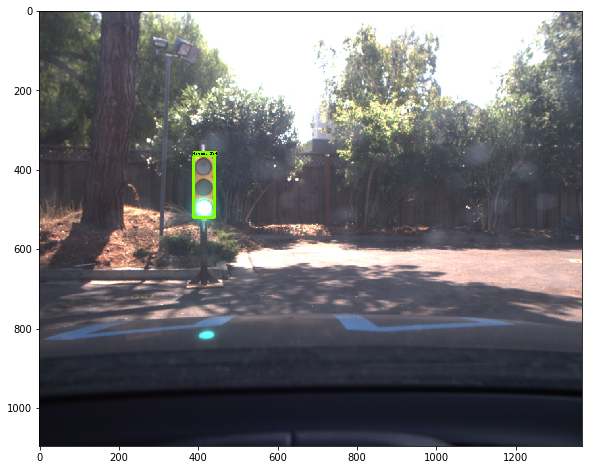

In [18]:
PATH_TO_IMGS = 'data/sample_real'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, '*.jpg'))
random.shuffle(TEST_IMGS)

# pick only 3 items
TEST_IMGS = TEST_IMGS[:5]

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores[0])
            print('CLASSES')
            print(classes[0])
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=(12,8))
            plt.imshow(image_np)
            plt.show()            